In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10   # Time and Hz, i.e. labels
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15  # Time(x) tick values
plt.rcParams['ytick.labelsize'] = 15  # Hz(y) tick values
plt.rcParams['legend.fontsize'] = 17
plt.rcParams['figure.titlesize'] = 10
plt.rcParams['axes.titlesize'] = 14   # Title font

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline
PI2 = np.pi * 2

import soundcard as sc
import IPython.display as ipd

from constants import *

# get a list of all speakers:
speakers = sc.all_speakers()
# get the current default speaker on your system:
default_speaker = sc.default_speaker()
# get a list of all microphones:
mics = sc.all_microphones()
# get the current default microphone on your system:
default_mic = sc.default_microphone()

from main import make_spectrum

def freq2key(freq):
    frequencies = np.array(list(KEY_FREQUENCY_MAP.values()))
    return FREQUENCY_KEY_MAP[
        frequencies[
            np.argmin(
                np.abs(frequencies - freq)
                )
            ]
        ]

In [2]:
def autocorrelate(ys):
    N = len(ys)
    lengths = range(N, N//2, -1)
    
    corrs = np.correlate(ys, ys, mode='same')
    lags = np.arange(-N//2, N//2)
    
    # Take only the positive half
    corrs = corrs[N//2:]
    
    corrs /= lengths
    corrs /= corrs[0]
    return corrs

## Test autocorrelation on piano

In [3]:
def get_piano_audio():
    waves = {}
    for i in range(8):
        waves[f'c{i}'] = thinkdsp.read_wave(f'data/piano/c{i}.wav')
        waves[f'd{i}'] = thinkdsp.read_wave(f'data/piano/d{i}.wav')
    return waves

In [4]:
piano_waves = get_piano_audio()

In [16]:
piano_waves['c0'].make_audio()

In [19]:
c0.framerate

44100

No handles with labels found to put in legend.


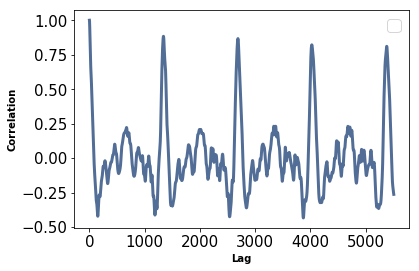

In [58]:
c0_corr = autocorrelate(piano_waves['c0'].ys[44100:44100+44100//4])

thinkplot.plot(c0_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

In [60]:
c0_corr.argmin()

3874

In [59]:
c0_corr[np.array(c0_corr[low:high]).argmax() + 1000]

0.8833644113373929

In [25]:
low, high = 1000, 1500
lag = np.array(c0_corr[low:high]).argmax() + low
lag

1341

In [26]:
period = lag / 44100
period

0.030408163265306123

In [27]:
frequency = 1 / period
frequency

32.88590604026846

No handles with labels found to put in legend.


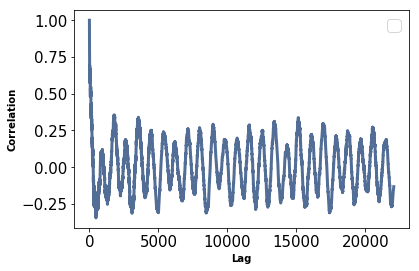

In [62]:
c7_corr = autocorrelate(piano_waves['c7'].ys[44100:44100+44100])

thinkplot.plot(c7_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

No handles with labels found to put in legend.


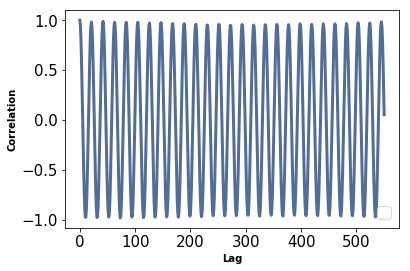

In [63]:
c6_corr = autocorrelate(piano_waves['c6'].ys[44100:44100+44100//40])

thinkplot.plot(c6_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

In [72]:
c6_corr_copy = c6_corr[:]
c6_corr_copy = c6_corr_copy[c6_corr_copy > 0.9]
# np.argmax(aa>5)

In [5]:
def get_next_peak_range(ys):
    a = np.argmax(ys < 0.7)

    start = np.argmax(ys[a:] > 0.7) + a

    end = np.argmax(ys[start:] < 0.7) + start
    return start, end

def get_frequency(ys, start, end):
    lag = ys[start:end].argmax() + start
    period = lag / 44100
    return 1/period

In [106]:
c6_freq = get_frequency(c6_corr, *get_next_peak_range(c6_corr)); 
c6_freq, freq2key(c6_freq)

(2100.0, 'c7')

In [107]:
c5_freq = get_frequency(c5_corr, *get_next_peak_range(c5_corr)); 
c5_freq, freq2key(c5_freq)

(1050.0, 'c6')

In [6]:
for k, v in piano_waves.items():
    corrs = autocorrelate(v.ys[44100:44100+44100//4])
#     thinkplot.plot(corrs)
#     thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])
    freq = get_frequency(corrs, *get_next_peak_range(corrs)); 
    pitch = freq2key(freq)
    print(f'Input: {k} --> {pitch}, {freq}')


Input: c0 --> c2, 32.88590604026846
Input: d0 --> d2, 37.12121212121212
Input: c1 --> c3, 65.91928251121077
Input: d1 --> d3, 73.74581939799332
Input: c2 --> c4, 131.25
Input: d2 --> d4, 147.0
Input: c3 --> c5, 262.5
Input: d3 --> d5, 294.0
Input: c4 --> c6, 525.0
Input: d4 --> d6, 588.0
Input: c5 --> c7, 1050.0
Input: d5 --> d7, 1191.8918918918919
Input: c6 --> c8, 2100.0
Input: d6 --> d8, 2321.0526315789475


ValueError: attempt to get argmax of an empty sequence

In [108]:
c1_freq = get_frequency(c1_corr, *get_next_peak_range(c1_corr)); 
c1_freq, freq2key(c1_freq)

(65.91928251121077, 'c2')

In [109]:
c0_freq = get_frequency(c0_corr, *get_next_peak_range(c0_corr)); 
c0_freq, freq2key(c0_freq)

(32.88590604026846, 'c1')

No handles with labels found to put in legend.


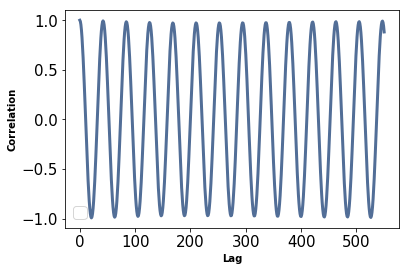

In [64]:
c5_corr = autocorrelate(piano_waves['c5'].ys[44100:44100+44100//40])

thinkplot.plot(c5_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

No handles with labels found to put in legend.


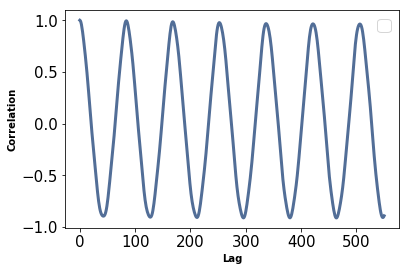

In [65]:
c4_corr = autocorrelate(piano_waves['c4'].ys[44100:44100+44100//40])

thinkplot.plot(c4_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

No handles with labels found to put in legend.


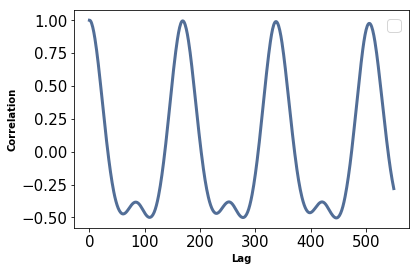

In [66]:
c3_corr = autocorrelate(piano_waves['c3'].ys[44100:44100+44100//40])

thinkplot.plot(c3_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

No handles with labels found to put in legend.


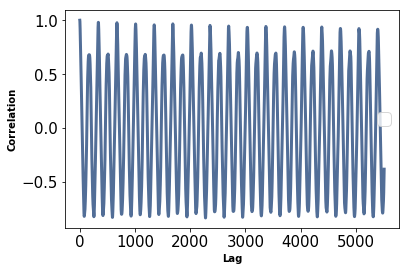

In [67]:
c2_corr = autocorrelate(piano_waves['c2'].ys[44100:44100+44100//4])

thinkplot.plot(c2_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

No handles with labels found to put in legend.


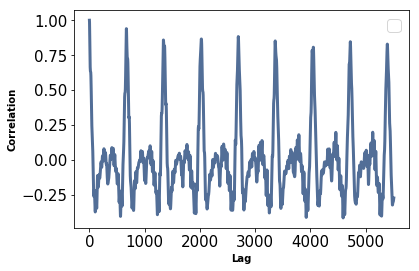

In [68]:
c1_corr = autocorrelate(piano_waves['c1'].ys[44100:44100+44100//4])

thinkplot.plot(c1_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

In [61]:
c1_corr.argmin()

563

In [40]:
ipd.Audio(piano_waves['c4'].ys[44100:44100+44100//40], rate=44100)

In [25]:
low, high = 1000, 1500
lag = np.array(c0_corr[low:high]).argmax() + low
lag

1341

In [26]:
period = lag / 44100
period

0.030408163265306123

In [27]:
frequency = 1 / period
frequency

32.88590604026846

In [ ]:
# Without ambient noise reduction
ys = wave[44100*2:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys, full=True)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[50, 200])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)
ipd.Audio(wave, rate=44100)

In [2]:
{ f'{k[:-1]}{int(k[-1])-1}':v for k, v in KEY_FREQUENCY_MAP.items()}

{'a#-1': 29.135,
 'a#0': 58.27,
 'a#1': 116.541,
 'a#2': 233.082,
 'a#3': 466.164,
 'a#4': 932.328,
 'a#5': 1864.655,
 'a#6': 3729.31,
 'a#7': 7458.62,
 'a-1': 27.5,
 'a0': 55.0,
 'a1': 110.0,
 'a2': 220.0,
 'a3': 440.0,
 'a4': 880.0,
 'a5': 1760.0,
 'a6': 3520.0,
 'a7': 7040.0,
 'b-1': 30.868,
 'b0': 61.735,
 'b1': 123.471,
 'b2': 246.942,
 'b3': 493.883,
 'b4': 987.767,
 'b5': 1975.533,
 'b6': 3951.066,
 'b7': 7902.133,
 'c#-1': 17.324,
 'c#0': 34.648,
 'c#1': 69.296,
 'c#2': 138.591,
 'c#3': 277.183,
 'c#4': 554.365,
 'c#5': 1108.731,
 'c#6': 2217.461,
 'c#7': 4434.922,
 'c#8': 8869.845,
 'c-1': 16.352,
 'c0': 32.703,
 'c1': 65.406,
 'c2': 130.813,
 'c3': 261.626,
 'c4': 523.251,
 'c5': 1046.502,
 'c6': 2093.005,
 'c7': 4186.009,
 'c8': 8372.019,
 'd#-1': 19.445,
 'd#0': 38.891,
 'd#1': 77.782,
 'd#2': 155.564,
 'd#3': 311.127,
 'd#4': 622.254,
 'd#5': 1244.508,
 'd#6': 2489.016,
 'd#7': 4978.032,
 'd#8': 9956.064,
 'd-1': 18.354,
 'd0': 36.708,
 'd1': 73.416,
 'd2': 146.832,
 'd3':